
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

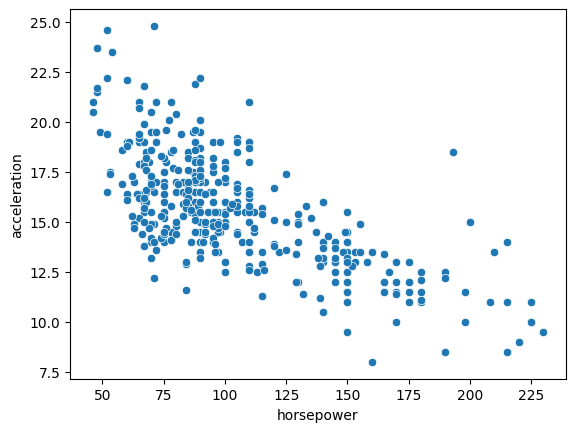

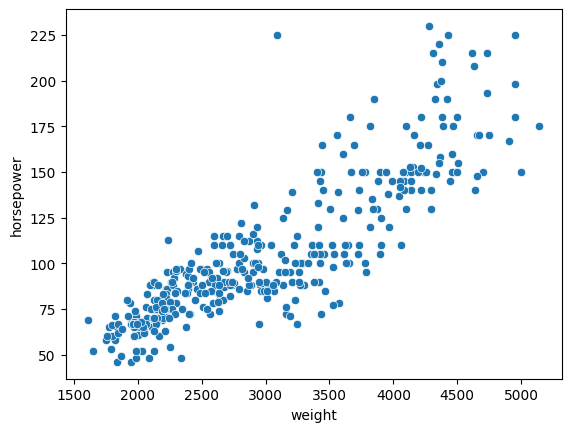

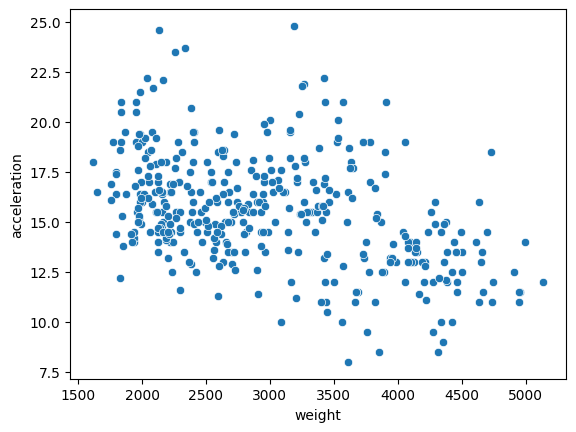

In [221]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = sns.load_dataset("mpg")

print(df.info())
print(df.describe())

df = df.dropna()

print(df[["mpg", "weight", "horsepower", "acceleration"]].describe())


sns.scatterplot(x="horsepower", y="acceleration", data=df)
plt.show()
sns.scatterplot(x="weight", y="horsepower", data=df)
plt.show()
sns.scatterplot(x="weight", y= "acceleration", data=df)
plt.show()



df = df.drop(columns=["name", "origin"])

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [222]:
from sklearn.model_selection import train_test_split
X = df[["weight", "horsepower", "acceleration", "displacement", "cylinders", "model_year"]]
y = df["mpg"]
# print(df.isnull().sum())
#df.insert(0, "Intercept", 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (313, 6)
X_test shape: (79, 6)
y_train shape: (313,)
y_test shape: (79,)


## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression


def training_regression_model(X_train,X_test,y_train,y_test,model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    

    return MSE, MAE, RMSE


linear_regression_model = LinearRegression()


MSE,MAE,RMSE = training_regression_model(X_train,X_test,y_train,y_test,linear_regression_model)

print(f"Mean absolute error: {MAE:.2f}")
print(f"Mean squared error: {MSE:.2f}")
print(f"Root mean squared error: {RMSE:.2f}")

Mean absolute error: 2.50
Mean squared error: 10.50
Root mean squared error: 3.24


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [224]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
        
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)


df_metrics = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE"])
df_metrics.loc[0] = ["Linear Regression", round(MAE,2), round(MSE,2), round(RMSE,2)]
print(f"MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

MAE: 2.50, MSE: 10.50, RMSE: 3.24


In [225]:
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(scale_X_train, y_train)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

df_metrics.loc[1] = ["Linear Regression with Standard Scaler", round(MAE,2), round(MSE,2), round(RMSE,2)]
print(f"MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

MAE: 2.50, MSE: 10.50, RMSE: 3.24


In [226]:
poly = PolynomialFeatures(degree=1)
poly_X_train = poly.fit_transform(scale_X_train)
poly_X_test = poly.transform(scale_X_test)

model = LinearRegression()
model.fit(poly_X_train, y_train)
y_pred = model.predict(poly_X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

df_metrics.loc[2] = ["Polynomial Regression (Degree 1)", round(MAE,2), round(MSE,2), round(RMSE,2)]
print(f"Polynomial Regression (Degree 1) - MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Polynomial Regression (Degree 1) - MAE: 2.50, MSE: 10.50, RMSE: 3.24


In [227]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(scale_X_train)
poly_X_test = poly.transform(scale_X_test)

model = LinearRegression()
model.fit(poly_X_train, y_train)
y_pred = model.predict(poly_X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

df_metrics.loc[3] = ["Polynomial Regression (Degree 2)", round(MAE,2), round(MSE,2), round(RMSE,2)]
print(f"Polynomial Regression (Degree 2) - MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Polynomial Regression (Degree 2) - MAE: 1.98, MSE: 7.42, RMSE: 2.72


In [228]:
poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(scale_X_train)
poly_X_test = poly.transform(scale_X_test)

model = LinearRegression()
model.fit(poly_X_train, y_train)
y_pred = model.predict(poly_X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

df_metrics.loc[4] = ["Polynomial Regression (Degree 3)", round(MAE,2), round(MSE,2), round(RMSE,2)]
print(f"Polynomial Regression (Degree 3) - MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Polynomial Regression (Degree 3) - MAE: 2.12, MSE: 10.44, RMSE: 3.23


In [230]:
df_metrics

,Model,MAE,MSE,RMSE
0,Linear Regression,2.50,10.50,3.24
1,Linear Regression with Standard Scaler,2.50,10.50,3.24
2,Polynomial Regression (Degree 1),2.50,10.50,3.24
3,Polynomial Regression (Degree 2),1.98,7.42,2.72
4,Polynomial Regression (Degree 3),2.12,10.44,3.23



## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---